In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

In [2]:
train_data=pd.read_csv(r"Data\train.csv")
test_data=pd.read_csv(r"Data\test.csv")


In [3]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [4]:
print(train_data.iloc[0:5,[0,1,2,3,-3,-2,-1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000
4   5          60       RL         84.0       WD        Normal     250000


In [13]:
feature=pd.concat((train_data.iloc[:,1:-1],test_data.iloc[:,1:]))
print(feature.iloc[0:5,[0,1,2,3,-3,-2,-1]])

   MSSubClass MSZoning  LotFrontage  LotArea  YrSold SaleType SaleCondition
0          60       RL         65.0     8450    2008       WD        Normal
1          20       RL         80.0     9600    2007       WD        Normal
2          60       RL         68.0    11250    2008       WD        Normal
3          70       RL         60.0     9550    2006       WD       Abnorml
4          60       RL         84.0    14260    2008       WD        Normal


In [27]:
feature['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [16]:
numeric_feature=feature.dtypes[feature.dtypes!="object"].index
feature[numeric_feature]=feature[numeric_feature].apply(lambda x:(x-x.mean())/(x.std()))
feature[numeric_feature]=feature[numeric_feature].fillna(0)


In [17]:
numeric_feature

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [18]:
feature[numeric_feature]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,-2.069222,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.569893,-0.968860,-0.29303,...,-2.195385,-0.740634,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.078492,-1.363335
1455,2.419286,-2.069222,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.569893,-0.415757,-0.29303,...,-0.867591,-0.740634,-0.347564,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.815205,-1.363335
1456,-0.873466,3.884968,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.569893,1.717643,-0.29303,...,0.478774,3.005615,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,-1.363335
1457,0.655311,-0.312950,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.569893,-0.229194,-0.29303,...,-2.195385,-0.108355,-0.229178,-0.359539,-0.103313,-0.285886,-0.063139,1.144116,0.289865,-1.363335


In [22]:
feature.shape

(2919, 79)

通过设置 dtype=int，指定生成的独热编码列的数据类型为整型（int）。默认情况下，pd.get_dummies() 生成的列类型是布尔型（bool）或者是浮点型（float），尤其是如果有 NaN 值的情况下。
将类型设置为 int 可以确保每个独热编码列中的值要么为 0（表示不属于该类别），要么为 1（表示属于该类别），且不包含 NaN 值。

In [25]:
features=pd.get_dummies(feature,dummy_na=True,dtype=int)
features.shape

(2919, 330)

In [37]:
n_train=train_data.shape[0]
train_features=torch.tensor(features[:n_train].values,dtype=torch.float32)
test_features=torch.tensor(features[n_train:].values,dtype=torch.float32)
train_labels=torch.tensor(train_data.SalePrice.values.reshape(-1,1),dtype=torch.float32)

In [29]:
train_labels

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [33]:

in_features=train_features.shape[1]

In [124]:
def model_net(in_features):
    return nn.Sequential(nn.Flatten(),nn.Linear(in_features,1024),nn.ReLU(),nn.Dropout(0.5),
            nn.Linear(1024,512),nn.ReLU(),nn.Dropout(0.5),nn.Linear(512,32),nn.ReLU(),nn.Dropout(0.5),
            nn.Linear(32,1))

#nn.Sequential(nn.Linear(in_features,1))


In [35]:
x=torch.randn(size=(10,330))
for layer in model:
    x=layer(x)
    print(layer.__class__.__name__,"output shape : ",x.shape)

Flatten output shape :  torch.Size([10, 330])
Linear output shape :  torch.Size([10, 256])
ReLU output shape :  torch.Size([10, 256])
Dropout output shape :  torch.Size([10, 256])
Linear output shape :  torch.Size([10, 128])
ReLU output shape :  torch.Size([10, 128])
Dropout output shape :  torch.Size([10, 128])
Linear output shape :  torch.Size([10, 32])
ReLU output shape :  torch.Size([10, 32])
Dropout output shape :  torch.Size([10, 32])
Linear output shape :  torch.Size([10, 1])


In [127]:
def logrmse(net,feature,labels,criterion):
    net.eval()
    with torch.no_grad():
        clipped_preds=torch.clamp(net(feature),1,float("inf"))
        rmse=torch.sqrt(criterion(torch.log(clipped_preds),torch.log(labels)))
    return rmse.item()

In [38]:
import torch.utils.data as data
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

In [139]:
def train(model,train_features,train_labels,valid_features,valid_labels,num_epochs,learning_rate,weight_decay,batch_size):
    train_loss,valid_loss=[],[]
    criterion=nn.MSELoss()
    train_iter=load_array([train_features,train_labels],batch_size)
    optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model=model.to(device)
    train_features,train_labels=train_features.to(device),train_labels.to(device)
    if valid_labels is not None:
        valid_features,valid_labels=valid_features.to(device),valid_labels.to(device)
    model.train()
    for epoch in range(num_epochs):
        for X,y in train_iter:
            X,y=X.to(device),y.to(device)
            optimizer.zero_grad()
            loss=criterion(model(X),y)
            loss.backward()
            optimizer.step()
        train_loss.append(logrmse(model,train_features,train_labels,criterion))
        if valid_labels is not None:
            valid_loss.append(logrmse(model,valid_features,valid_labels,criterion))
    return train_loss,valid_loss

In [63]:
def get_K_fold_data(k,i,X,y):
    assert k>2,"only support k>=3 folds"
    fold_size=X.shape[0]//k
    X_train,y_train=None,None
    for j in range(k):
        idx=slice(j*fold_size,(j+1)*fold_size)
        X_part,y_part=X[idx,:],y[idx,:]
        if j==i:
            X_valid,y_valid=X_part,y_part
        elif X_train is None:
            X_train,y_train=X_part,y_part
        else:
            X_train=torch.cat([X_train,X_part],dim=0)
            y_train=torch.cat([y_train,y_part],dim=0)
    return X_train,y_train,X_valid,y_valid
            


In [77]:
from matplotlib_inline import  backend_inline
import matplotlib.pyplot as plt
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale="linear",yscale="linear",ftms=("-","m--","g-.","r:"),figsize=(8,6),axes=None):
    if legend is None:
        legend=[]
    backend_inline.set_matplotlib_formats("svg")
    plt.rcParams["figure.figsize"]=figsize
    if axes:
        axes=axes
    else:
        axes=plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X,"ndim") and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X=[X]
    if Y is None:
        X,Y=[[]]*len(X),X
    elif has_one_axis(Y):
        Y=[Y]
    if len(X)!=len(Y):
        X=X*len(Y)
    axes.cla()
    for x,y,ftm in zip(X,Y,ftms):
        if len(x):
            axes.plot(x,y,ftm)
        else:
            axes.plot(y,ftm)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()


In [130]:
def K_Fold_CV(K,X_train,y_train,num_epochs,learning_rate,weight_decay,batch_size,model_net,in_features):
    train_loss_sum,valid_loss_sum=0,0
    for i in range(K):
        data=get_K_fold_data(K,i,X_train,y_train)
        net=model_net(in_features)
        train_loss,valid_loss=train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        for name, param in net.named_parameters():
            print(f"Parameter name: {name}")
            print(f"Parameter value: {param.data}")
        train_loss_sum+=train_loss[-1]
        valid_loss_sum+=valid_loss[-1]
        if i==0:
            plot(list(range(1,num_epochs+1)),[train_loss,valid_loss],xlabel="epoch",ylabel="rmse",xlim=[1,num_epochs],ylim=[0.1,10],legend=["train","valid"],yscale="log")
        print(f"{i+1} train log rmse {float(train_loss[-1]):.6f} valid log rmse {float(valid_loss[-1]):.6f}")
    return train_loss_sum/K,valid_loss_sum/K

In [52]:
in_features

330

Parameter name: 1.weight
Parameter value: tensor([[-2.9093e+03,  2.2894e+03,  3.1144e+03,  8.6849e+03,  4.1108e+03,
          4.6731e+03,  5.2688e+03,  5.7004e+03,  5.3729e+03,  8.1903e+02,
          2.0159e+03,  5.6641e+03,  6.2957e+03,  5.6494e+03, -1.2372e+03,
          6.6448e+03,  4.4224e+03,  3.8621e+02,  5.7754e+03,  3.4715e+03,
         -3.1513e+02, -4.9429e+03,  6.2906e+03,  5.8105e+03,  3.5273e+03,
          6.1146e+03,  5.1620e+03,  4.2862e+03,  1.9212e+03,  9.6800e+02,
          1.4785e+03,  2.5154e+03,  7.4548e+02,  2.4672e+02,  5.1074e+02,
         -2.6263e+02, -4.0026e+03,  4.2764e+03,  4.0817e+03,  4.5080e+03,
          2.6511e+03,  1.8834e-02, -2.8506e+03,  4.4233e+03,  1.0957e-02,
          1.8558e+03,  4.5555e+03,  4.3780e+03,  5.0387e+03,  5.1252e+03,
         -8.1002e+02,  3.8354e+03, -5.2411e-02,  5.9821e+02,  6.4623e+03,
          3.5837e+03,  4.3049e+03,  4.3366e-02,  4.3837e+03, -1.5923e+03,
          3.9983e-02,  3.8812e+03,  6.2890e+03,  1.9219e+03,  1.4246e+

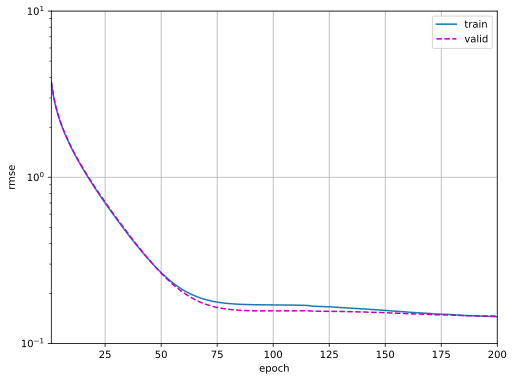

In [140]:
K=5
num_epochs=200
lr=5
weight_decay=0
batch_size=64
train_l,valid_l=K_Fold_CV(K,train_features,train_labels,num_epochs,lr,weight_decay,batch_size,model_net,in_features=in_features)
print(f"{K}-Fold CV，mean train log rmse:{float(train_l):.6f},mean valid log rmse: {float(valid_l):.6f}")

In [153]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size,in_features):
    net = model_net(in_features)
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net=net.to(device)
    test_features=test_features.to(device)
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs],ylim=[0.1,10], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    preds = net(test_features).detach().cpu().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse：0.136109


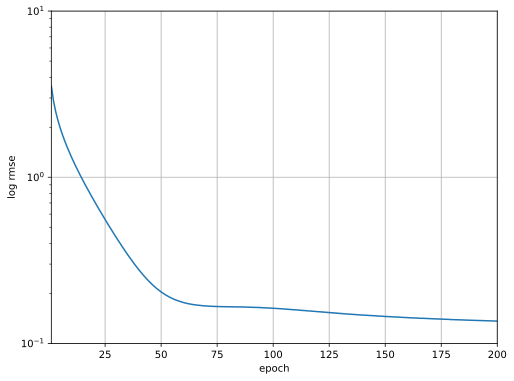

In [154]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size,in_features
               )